In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


TYPE = "cloud"


if(TYPE == "cloud"):
    base_dir = './cloud/video/01'
elif(TYPE == "local"):
    base_dir = './local/video/01'
    
file_list = os.listdir(base_dir)


data = {}
data["Average RTT(ms)"] = []
data["Average Interaction Delay (ms)"] = []
data["Average Throughput (Mbps)"] = []
data["Schemes"] = []

NAME_MAPPING = {
    "MONAX": "Monax (Ours)",
    "VEGAS": "Vegas",
    "CUBIC": "Cubic",
    "PCC-ALLEGRO": "PCC Allegro",
    "PCC-VIVACE": "PCC Vivace",
    "BBR": "BBR"
}


points = {}


for file in file_list:
    if('csv' in file):
        print(file)
        CC = file.split('_')[0].upper()
        df = pd.read_csv(os.path.join(base_dir,file))
        RTT_average = df['RTT_average'].values
        end2end_average = df['end2end_average'].values
        delivery_rate_average = df['delivery_rate_average'].values
        
        if(NAME_MAPPING[CC] not in points):
            points[NAME_MAPPING[CC]] = {}
            points[NAME_MAPPING[CC]]["delay"] = []
            points[NAME_MAPPING[CC]]["throughput"] = []
            
        points[NAME_MAPPING[CC]]["delay"].append(end2end_average)
        points[NAME_MAPPING[CC]]["throughput"].append(delivery_rate_average)
        
        data["Average RTT(ms)"]+=list(RTT_average)
        data["Average Interaction Delay (ms)"]+=list(end2end_average)
        data["Average Throughput (Mbps)"]+=list(delivery_rate_average)
        data["Schemes"]+=[NAME_MAPPING[CC] for i in range(len(end2end_average))]

        
MARKERS = {"Monax (Ours)":'D', "Vegas":'s', "Cubic":'o', "PCC Allegro":'X', "PCC Vivace":'^', "BBR":'P'}
CCS = ["Monax (Ours)", "Cubic", "BBR", "Vegas","PCC Allegro", "PCC Vivace"]

points

cubic_2021_12_25_17_45_21.csv
bbr_2021_12_25_17_52_22.csv
pcc-allegro_2021_12_25_20_14_10.csv
monax_2021_12_25_17_25_42.csv
pcc-vivace_2021_12_25_19_17_25.csv
vegas_2021_12_25_17_34_38.csv


{'Cubic': {'delay': [array([45.50855029])],
  'throughput': [array([10.91112896])]},
 'BBR': {'delay': [array([35.04882798])],
  'throughput': [array([10.89224439])]},
 'PCC Allegro': {'delay': [array([53.03500809])],
  'throughput': [array([10.85667343])]},
 'Monax (Ours)': {'delay': [array([30.20105661])],
  'throughput': [array([10.91453883])]},
 'PCC Vivace': {'delay': [array([32.50310709])],
  'throughput': [array([10.90005882])]},
 'Vegas': {'delay': [array([37.49559612])],
  'throughput': [array([10.9043139])]}}

In [219]:
# X_LIMIT = (70, 120)
# Y_LIMIT = (10, 11.5)

# X_LIMIT = (28, 55)
# Y_LIMIT = (10.85, 10.95)

# sns.set(font_scale=3)
# sns.set_style("whitegrid")
# # tips = {}
# # tips['Latency'] = [1,2,3,4,5,6,7,8,9,10]
# # tips['Throughput'] =ii [10,9,8,7,6,5,4,3,2,1]
# # tips['CC'] = ['BBR', 'CUBIC', 'Vivace', 'CUBIC','BBR', 'CUBIC', 'Allegro','BBR', 'CUBIC','BBR']
# # tips = pd.DataFrame(tips)


# g = sns.relplot(x="Average Interaction Delay (ms)", y="Average Throughput (Mbps)", hue='Schemes', style='Schemes', aspect=1, data=data, s=1000);
# for lh in g._legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [300] 
    
# # g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
# g.set_xticklabels(fontsize=22)
# g.set_yticklabels(fontsize=22)

# g.savefig("./01.png", dpi = 400)    




# plt.xlim(0)
# plt.ylim(38,46)

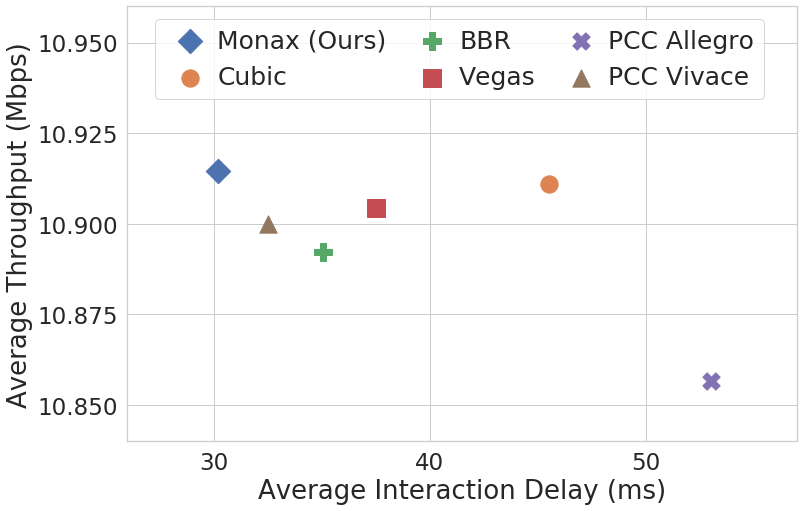

In [334]:
MARKER_SIZE = 300

fig, axes = plt.subplots(1, 1, figsize=(12,8))

x = list(range(1,17))


count = 0
for CC in CCS:
# 折线图
    axes.scatter(points[CC]["delay"], points[CC]["throughput"], label=CC, marker=MARKERS[CC], s=MARKER_SIZE)
    count+=1


plt.legend(loc=1, fontsize=25, bbox_to_anchor = (0.97,1), title_fontsize=25, ncol=3, columnspacing=0.8, handletextpad=0.1)

# 画网格线
axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Average Interaction Delay (ms)",fontsize=26)
plt.ylabel("Average Throughput (Mbps)",fontsize=26)

#设置坐标刻度字体大小
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)

if(TYPE == "cloud"):
    plt.xlim(26,57)
    plt.ylim(10.84,10.96)
    plt.savefig("cloud_test.png", bbox_inches = 'tight')
elif(TYPE == "local"):
    plt.xlim(70,120)
    plt.ylim(10,11.4)
    plt.savefig("local_test.png", bbox_inches = 'tight')







plt.show()